In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the training, validation, and test data
train_df = pd.read_csv('Training/train_2013_2020.csv', parse_dates=["Date"])
valid_df = pd.read_csv('Training/valid_2021_2022.csv', parse_dates=["Date"])
test_df = pd.read_csv('Training/test_2023_2025.csv', parse_dates=["Date"])

print("\nDataframe loaded!")


2025-04-07 17:09:06.084692: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 17:09:06.277707: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-07 17:09:07.200458: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.



Dataframe loaded!


In [2]:
# Take a look:
train_df.head()

,Date,Ticker,Open,High,Low,Close,Volume,SMA_50,SMA_200,EMA_12,EMA_26,RSI_14,MACD,Bollinger_Upper,Bollinger_Lower,OBV,VIX,GSPC,5_day_return
0,2013-10-16,AAPL,15.495887,15.549728,15.447617,15.505789,251101200,15.032551,13.979203,15.189830,15.045010,62.303597,0.144821,15.554754,14.534793,-2.499042e+09,14.71,1721.540039,4.759481
1,2013-10-16,AMD,4.100000,4.100000,4.030000,4.090000,34138300,3.723600,3.341950,3.897477,3.840017,61.363635,0.057461,4.066061,3.667939,5.815740e+08,14.71,1721.540039,-23.227384
2,2013-10-16,AMZN,15.419000,15.540000,15.277500,15.524500,43414000,15.018840,13.954720,15.468081,15.382953,44.246720,0.085127,16.190246,15.028954,5.679480e+08,14.71,1721.540039,5.240101
3,2013-10-16,CRM,50.696837,52.636007,50.696837,52.287952,5546400,48.406231,43.628603,51.223758,50.579232,46.932021,0.644525,53.720300,49.767677,1.610380e+07,14.71,1721.540039,1.445403
4,2013-10-16,GOOGL,22.063435,22.373763,22.017109,22.366291,80223696,21.837339,20.964062,21.855881,21.870292,60.675127,-0.014411,22.534776,21.243958,7.742250e+08,14.71,1721.540039,14.852515


In [3]:
# Take a look:
valid_df.head()


,Date,Ticker,Open,High,Low,Close,Volume,SMA_50,SMA_200,EMA_12,EMA_26,RSI_14,MACD,Bollinger_Upper,Bollinger_Lower,OBV,VIX,GSPC,5_day_return
0,2021-01-04,ORCL,60.790056,60.799448,59.361688,59.906723,11249900,55.822542,52.522186,59.991729,58.496417,69.674248,1.495312,63.279143,54.630446,1.262044e+09,26.969999,3700.649902,-0.751080
1,2021-01-04,AAPL,130.419822,130.507728,123.816779,126.405251,143301900,118.424647,98.343024,127.618833,124.236822,62.119154,3.382012,134.230001,115.929484,5.634157e+09,26.969999,3700.649902,-0.332287
2,2021-01-04,AMD,92.110001,96.059998,90.919998,92.300003,51802600,87.175000,70.334900,92.376486,91.330042,52.120032,1.046445,97.483014,88.911988,5.505119e+09,26.969999,3700.649902,5.362943
3,2021-01-04,AMZN,163.500000,163.600006,157.201004,159.331497,88228000,158.657401,144.192485,161.298667,160.159392,57.205009,1.139274,165.847456,153.786495,1.081132e+10,26.969999,3700.649902,-2.272622
4,2021-01-04,CRM,221.403348,222.507183,214.521787,219.086288,10319900,237.030087,206.766522,223.160623,227.773140,45.993135,-4.612517,229.233860,217.163813,4.549484e+08,26.969999,3700.649902,-0.935030


In [4]:
# Take a look:
test_df.head()

,Date,Ticker,Open,High,Low,Close,Volume,SMA_50,SMA_200,EMA_12,EMA_26,RSI_14,MACD,Bollinger_Upper,Bollinger_Lower,OBV,VIX,GSPC,5_day_return
0,2023-01-03,NVDA,14.838840,14.983722,14.084458,14.303279,401277000,15.347197,16.943800,15.178464,15.547839,24.371205,-0.369375,18.489713,13.560524,7.974911e+10,22.9,3824.139893,11.135182
1,2023-01-03,MSFT,238.676603,241.298234,233.099488,235.240005,25740000,236.342352,254.952796,236.743146,238.152699,35.422830,-1.409553,252.360838,227.619924,3.482504e+09,22.9,3824.139893,-4.478672
2,2023-01-03,META,122.243862,125.777212,121.706394,124.154854,35528500,112.542985,159.545859,118.442426,117.021508,62.252629,1.420918,123.416193,111.284665,4.040500e+09,22.9,3824.139893,6.613754
3,2023-01-03,INTC,26.083715,26.103001,25.428008,25.775146,31308000,27.102699,33.790724,25.705760,26.343984,31.985293,-0.638224,28.519716,24.081638,6.730069e+08,22.9,3824.139893,10.138409
4,2023-01-03,ORCL,80.057697,81.387619,79.853840,81.271133,8997500,76.876740,72.006401,78.977334,78.157864,60.445261,0.819470,80.486745,76.076666,1.367710e+09,22.9,3824.139893,3.708001


In [5]:
# Sort by Date to ensure correct ordering (important for time series)
train_df.sort_values(by=["Date", "Ticker"], inplace=True)
valid_df.sort_values(by=["Date", "Ticker"], inplace=True)
test_df.sort_values(by=["Date", "Ticker"], inplace=True)

# Encode Ticker column (if you want to keep it as a feature)
label_encoder = LabelEncoder()
train_df['Ticker'] = label_encoder.fit_transform(train_df['Ticker'])
valid_df['Ticker'] = label_encoder.transform(valid_df['Ticker'])  # Use same encoding for validation
test_df['Ticker'] = label_encoder.transform(test_df['Ticker'])  # Use same encoding for test

# Separate the target column and features for scaling
train_features = train_df.drop(columns=['Date', '5_day_return']) # Date as 
valid_features = valid_df.drop(columns=['Date', '5_day_return'])
test_features = test_df.drop(columns=['Date', '5_day_return'])
y_train = train_df['5_day_return'].values
y_val = valid_df['5_day_return'].values
y_test = test_df['5_day_return'].values

# Normalize the features (MinMax scaling to [0, 1])
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on training features and apply to all sets
train_scaled_features = scaler.fit_transform(train_features)
valid_scaled_features = scaler.transform(valid_features)
test_scaled_features = scaler.transform(test_features)


def create_sequences(features, targets, window_size=60):
    X, y = [], []
    for i in range(window_size, len(features)):
        X.append(features[i - window_size:i])
        y.append(targets[i])
    return np.array(X), np.array(y)


X_train, y_train = create_sequences(train_scaled_features, y_train)
X_val, y_val = create_sequences(valid_scaled_features, y_val)
X_test, y_test = create_sequences(test_scaled_features, y_test)


# Print the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (18100, 60, 17)
Validation data shape: (4970, 60, 17)
Testing data shape: (5550, 60, 17)


In [6]:
# Build the LSTM model
model = tf.keras.Sequential()

# Add LSTM layers
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.LSTM(units=32))
model.add(tf.keras.layers.Dense(16, activation='relu'))  # Fully connected layer
model.add(tf.keras.layers.Dense(1))  # Output layer (predicts the 5-day return)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


W0000 00:00:1744034948.264420   10203 gpu_device.cc:2340] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/jesse/Projects/myenvs/tf_nightly/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,953 (132.63 KB)

 Trainable params: 33,953 (132.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 22.0232 - val_loss: 31.2014
Epoch 2/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 21.5715 - val_loss: 30.7095
Epoch 3/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 21.7326 - val_loss: 30.8558
Epoch 4/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 21.0527 - val_loss: 31.3399
Epoch 5/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 21.1727 - val_loss: 30.7107
Epoch 6/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 21.5530 - val_loss: 30.6134
Epoch 7/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 21.6544 - val_loss: 30.6083
Epoch 8/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 21.4915 - val_loss: 30.6569
Epoch 9/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 20.9026 - val_loss: 30.7792
Epoch 10/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 21.8937 - val_loss: 31.1608
Epoch 11/200
566/566 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 21.6116 - val_loss: 30.6542
Epoch 12

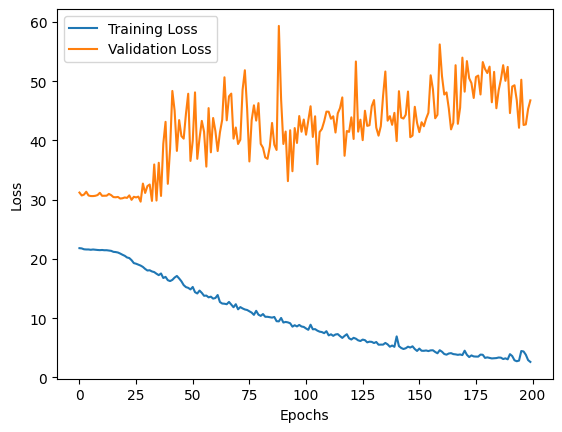

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 83.3866
Test Loss: 59.111385345458984


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Absolute Error (MAE): 5.848311302846379
Mean Squared Error (MSE): 59.11137954147857
R-squared: -1.1599605508131527


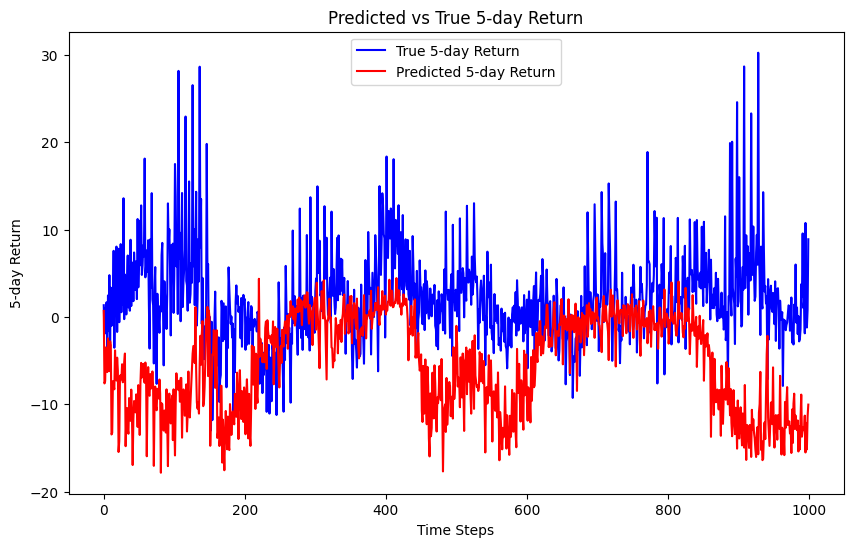

In [10]:
import matplotlib.pyplot as plt

# Plot predicted vs true values
plt.figure(figsize=(10,6))
plt.plot(y_test[:1000], label="True 5-day Return", color='blue')
plt.plot(y_pred[:1000], label="Predicted 5-day Return", color='red')
plt.title("Predicted vs True 5-day Return")
plt.xlabel("Time Steps")
plt.ylabel("5-day Return")
plt.legend()
plt.show()


In [11]:
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of y_pred: (5550, 1)
Shape of y_test: (5550,)


In [12]:
# Flatten y_pred to a 1D array
y_pred = y_pred.squeeze()

# Now both y_pred and y_test will be 1D arrays and have the same shape
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of y_pred: (5550,)
Shape of y_test: (5550,)


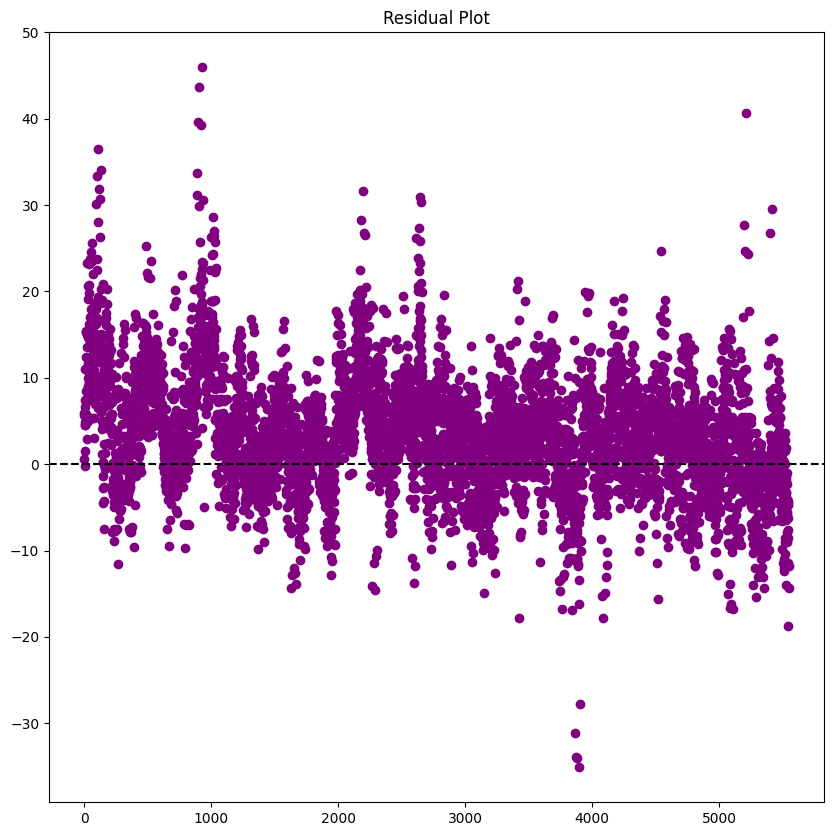

In [13]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10,10))
plt.scatter(range(len(residuals)), residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Plot")
plt.show()
